# Assignment 4.1

Name:  **Victor Hugo Germano**

Date:  09/20/2024 

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import scipy.stats as stats

sns.set()# Setting seaborn as default style

## Problem # 4.1.

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 100$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 100,000 samples of size
100 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 100,000
estimates with the theoretical standard error of $\bar{Y}$.

`Your answer goes here`

In [2]:

num_samples = 100000  
sample_size = 100  

quartile_means = []

# Generate samples from a normal distribution (mean = 0, std = 1)
samples = np.random.normal(loc=0, scale=1, size=(num_samples, sample_size))

for sample in samples:
    Q1, Q3 = np.percentile(sample, [25, 75])   
    # Calculate the mean estimate based on quartiles
    mean_estimate = (Q1 + Q3) / 2
    quartile_means.append(mean_estimate)

quartile_means = np.array(quartile_means)

# Calculate standard deviation of the quartile-based estimates
std_dev_quartile_estimates = np.std(quartile_means)

population_std_dev = 1  
theoretical_se = population_std_dev / np.sqrt(sample_size)

# Output results
print("Standard Deviation of Quartile-Based Estimates:", std_dev_quartile_estimates)
print("Theoretical Standard Error of Sample Mean:", theoretical_se)

Standard Deviation of Quartile-Based Estimates: 0.11034998875591202
Theoretical Standard Error of Sample Mean: 0.1


## Problem # 4.2.

For a sequence of observations of a binary random variable, you observe the geometric random
variable (Section 2.2.2) outcome of the first success on observation number $y = 3$. Find and plot
the likelihood function.

`our answer goes here`

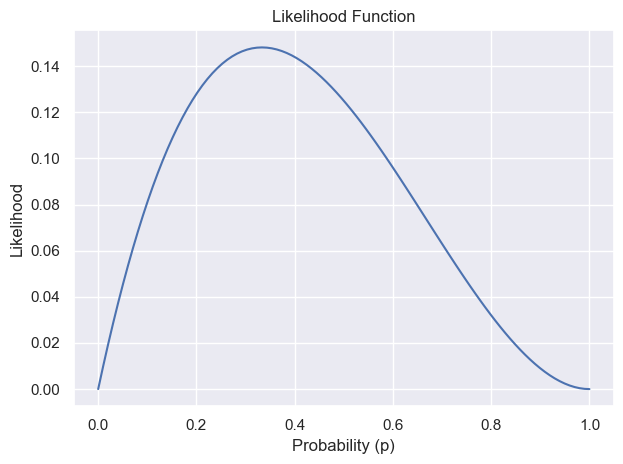

In [66]:
def likelihood(y, p):
    return (1 - p)**(y - 1) * p

y = 3
p_values = np.linspace(0, 1, 100)

likelihoods = likelihood(y, p_values)

plt.plot(p_values, likelihoods)
plt.xlabel('Probability (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.tight_layout()
plt.show()

---

## Note 
For next questions I will use the following method to find the confidence interval 

In [19]:
# Confidence interval inference, default CI 95% with z value 1.96
def find_confidence_interval(proportion, std_error, z = 1.96): 
    margin_error = z * std_error
    lower_limit = proportion - margin_error
    upper_limit = proportion + margin_error
    print("%s [%.4f, %.4f]" % ('95% Confidence Interval: ', lower_limit, upper_limit))



## Problem # 4.4.

For the `Students` data file (Exercise 1.2 in Chapter 1) and corresponding population, find the
ML estimate of the population proportion believing in life after death. Construct a Wald 95%
confidence interval, using its formula (4.8). Interpret.

`Your answer goes here`

In [26]:
# Read in the Students data file
students = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Students.dat', sep=r'\s+')

# View the first few rows of the dataset
students.head()

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2


In [16]:
# Variable:  life = belief in life after death (1 = yes, 2 = no, 3 = undecided)
life_after = students["life"]
sample_size = len(life_after.index)

z = 1.96 #95%

# find life=1 proportion
believe_life_after = len(life_after[life_after == 1].index)
p_hat = believe_life_after / sample_size 


std_dev = np.std(life_after)
std_error = std_dev / np.sqrt( sample_size ) 

# create 95% confidence interval 
find_confidence_interval(p_hat, std_error)

print("ML Estimate of the population proportion:  ", p_hat)
print("std dev", std_dev)
print("std error", std_error)

# 95% confidence interval


95% Confidence Interval:  [0.3018, 0.7315]
ML Estimate of the population proportion:   0.5166666666666667
std dev 0.8490190417966686
std error 0.10960788698304921


### Interpretation 

The confidence interval of [0.3018, 0.7315] is the range of values that we are 95% confident contains the true population proportion of Students believing in life after death 

## Problem # 4.5. 

The General Social Survey has asked respondents, “Do you think the use of marijuana should
be made legal or not?” View results at the most recent cumulative datafile at sda.berkeley.edu/archive.htm by entering the variables GRASS and YEAR.

(a) Describe any trend you see since 1973 in the percentage favoring legalization.   
(b) In the 2018 survey, 938 of 1447 were in favor of legalization. Use a Wald or score confidence
interval to determine if this provides sufficient evidence to conclude whether a majority
or a minority of the population support legalization.

`(a) Your answer goes here`

By the year 1973, the vast majority of answers, 79.7% against 20.3%, did not approved the legalization of Marijuana, and even thought we can see an increase in acceptance between 1975 and 1980, the real increase in favor of legalization started happening in 1991.

From this point on, the curve follows a direct line torwads 2022, where the number of people in favor of legalization swaped places to a opposite result from 1973, this time with 72.2% in favor of legalization, and 27% against it.

The trend shows a consistent increase in support, with a few minor fluctuations. The largest increase occurred between 2012 and 2014, where support jumped from around 50% to over 70%

`(b) Your answer goes here`

In [17]:
sample_size = 1447
in_favor = 938

z = 1.96 # for 95% confidence level

sample_proportion = in_favor / sample_size # phat
std_error = np.sqrt( sample_proportion * (1 - sample_proportion) /  sample_size )

lower_limit, upper_limit = find_confidence_interval(p_hat, std_error)

print("std error", std_error)


95% Confidence Interval:  [0.4921, 0.5413]
std error 0.012553288609054651


### Interpretation

Assuming the 95% confidence level, we calculated the confidence interval assuming the data provided.
    
Since the entire range of our confidence interval (0.6225 to 0.6735) is above 0.5:
- This indicates that we have strong evidence that more than half of the population supports legalization.
- Because our interval does not include 0.5 and instead only contains values greater than 0.5, we can confidently conclude that there is sufficient evidence to suggest that a majority of the population supports marijuana legalization
  

## Problem # 4.7.

A social scientist wanted to estimate the proportion of school children in Boston who live in
a single-parent family. She decided to use a sample size such that, with probability 0.95, the
error would not exceed 0.05. How large a sample size should she use, if she has no idea of the
size of that proportion?

`Your answer goes here`

### Answer

To find a sample size big enough to accomodate a error of 0.05 and a probability of 95%, we need to apply the sample size formula

In [7]:
z = 1.96  # 95 CI
std_error =  0.05
assumed_proportion = 0.5

# using the formula for calculating sample size
sample_size = (z**2 * assumed_proportion*(1 - assumed_proportion) )  / std_error**2

print("Expected sample size: %.2f"%sample_size)

Expected sample size: 384.16


## Problem # 4.11.

The observations on number of hours of daily TV watching for the 10 subjects in the 2018 GSS
who identified themselves as Islamic were 0, 0, 1, 1, 1, 2, 2, 3, 3, 4.

(a)  Construct and interpret a 95% confidence interval for the population mean.
(b)  Suppose the observation of 4 was incorrectly recorded as 24. What would you obtain for
the 95% confidence interval? What does this suggest about potential effects of outliers on
confidence intervals for means?

`(a) Your answer goes here`

In [20]:
# Defined
daily_tv_hours = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]
sample_size = 10
confidence = 0.95

sample_mean = np.mean(daily_tv_hours)
std_error = stats.sem(daily_tv_hours)

find_confidence_interval(sample_mean, std_error)


95% Confidence Interval:  [0.8710, 2.5290]


### Interpretation

The confidence interval of (0.8710, 2.5290) represent the mean time that 95% of the sample size would watch TV. In this case, this represents between aproximetly 52 minutes, to 2.5 hours.


`(b) Your answer goes here`

In [25]:

# Representing the miss recorded value
daily_tv_hours = [0, 0, 1, 1, 1, 2, 2, 3, 3, 24]

sample_mean = np.mean(daily_tv_hours)
std_error = stats.sem(daily_tv_hours)

find_confidence_interval(sample_mean, std_error)


95% Confidence Interval:  [-0.7700, 8.1700]


# Interpretation

The outlier represented by the observed record of 24, changes completely the results, and we can question the viability of the information in order to present an interpretation, given the fact that the confidence interval accomodate a negative value for a discrete variable (time watching TV)

This represents the possible fragility of using the mean of the data as one single point of analysis, and we should expect more information to paint the real picture of this sample, affecting our conclusions about the Population mean.

---


## Problem # 4.14.

Using the Students data file, for the corresponding population, construct a 95% confidence interval **(a)** for the mean weekly number of hours spent watching TV; **(b)** to compare females and
males on the mean weekly number of hours spent watching TV. In each case, state assumptions,
including the practical importance of each, and interpret results.

`Your answer goes here`

In [27]:
# Read in the Students data file
students = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Students.dat', sep=r'\s+')

# View the first few rows of the dataset
students.head()

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2


### Answer
a) The results from the 95% confidence interval are that, the time spent watching TV weekly fall under 5.5 and 8.95 hours per week.

In [34]:
# allocating variable with both columns
tv_watch_time = students['tv']

mean_watch_time = np.mean(tv_watch_time)
std_error = stats.sem(tv_watch_time)

print("TV Watch time")
find_confidence_interval(mean_watch_time, std_error)



TV Watch time
95% Confidence Interval:  [5.5669, 8.9664]


b) When we analyse the data by gender, we can see a clear change between habits of female and male students on the time they spent per week watching TV, with female students with over one hour mean from their male counterparts. This Information can be useful when planing specific tactics to communicate with any of the populations.
 
Assuming for both a normal populatio distribution, the central limit theory applies

FEMALES weekly time spent on TV 
- Mean: 7.98
- 95% Confidence Interval:  [5.7424, 10.2253]

MALES weekly time spent on TV 
- Mean: 6.50
- 95% Confidence Interval:  [3.9145, 9.0855]



In [40]:
# Reference - gender (1 = female, 0 = male)

print("==== FEMALES weekly time spent on TV ====")
females_watch_time = students[students["gender"] == 1]['tv']

mean_watch_time = np.mean(females_watch_time)
std_error = stats.sem(females_watch_time)
print("Mean: %.2f"%mean_watch_time)

find_confidence_interval(mean_watch_time, std_error);print()



print("==== MALES weekly time spent on TV ====")
males_watch_time = students[students["gender"] == 0]['tv']

mean_watch_time = np.mean(males_watch_time)
std_error = stats.sem(males_watch_time)
print("Mean: %.2f"%mean_watch_time)

find_confidence_interval(mean_watch_time, std_error)

==== FEMALES weekly time spent on TV ====
Mean: 7.98
95% Confidence Interval:  [5.7424, 10.2253]

==== MALES weekly time spent on TV ====
Mean: 6.50
95% Confidence Interval:  [3.9145, 9.0855]


## Problem # 4.15.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017
of 1178 females said yes, and 703 of 945 males said *yes*. Construct 95% confidence intervals
for the population proportions of females and males that believe in life after death and for the
difference between them. Interpret.

`Your answer goes here`

### Answer & Interpretation

- The confidence interval for females indicates that we are confident that between approximately 84.4% and 88.3% of females believe in life after death.
- The confidence interval for males indicates that we are confident that between approximately 71% and 77% of males believe in life after death.
- With females being more likely to believe in life after death by approximately 8.5% to 15.35%, the confidence interval for the difference between these proportions suggests that there is a significant difference in belief between females and males.

In [51]:
# Given data to work with
female_sample = 1178
female_believers = 1017
female_proportion = female_believers / female_sample
female_variance = (female_proportion * (1 - female_proportion)) / female_sample

male_sample = 945
male_believers = 703
male_proportion = male_believers / male_sample
male_variance = (male_proportion * (1 - male_proportion)) / male_sample

# applying SE formula
female_se = np.sqrt(female_variance)
male_se = np.sqrt(male_variance)


print("==== FEMALE after life believers ====")
find_confidence_interval(female_proportion, female_se);print()


print("==== MALE after life believers ====")
find_confidence_interval(male_proportion, male_se);print()


# Calculating the difference between the proportions
diff_proportion = female_proportion - male_proportion
diff_variance = np.sqrt(female_variance + male_variance)

print("==== Confidence Interval for the Difference ====")
find_confidence_interval(diff_proportion, diff_variance);print()



==== FEMALE after life believers ====
95% Confidence Interval:  [0.8437, 0.8829]

==== MALE after life believers ====
95% Confidence Interval:  [0.7161, 0.7717]

==== Confidence Interval for the Difference ====
95% Confidence Interval:  [0.0854, 0.1535]



## Problem # 4.23.

You want to estimate the proportion of students at your school who answer *yes* when asked
whether governments should do more to address global warming. In a random sample of 10
students, every student says *yes*. Give a point estimate of the probability that the next student
interviewed will answer *yes*, if you use **(a)** ML estimation, **(b)** Bayesian estimation with a
uniform prior distribution.

`Your answer goes here`

In [56]:
# data given
sample_size = 10 #x
yes_responses = 10 #n


# Maximum likelihood Estimation
pml = yes_responses / sample_size
print("Pml: %.2f  - Probability of the next student will say yes"%pml)

# Bayesian Estimation - formula for the prior distribution
# assuming p|x,n ~Beta(x + alpha, n - x + beta) = Beta(11, 1)

alpha = sample_size + 1
beta = yes_responses - yes_responses + 1

estimate = alpha / (alpha + beta)
print("Bayesian Point Estimation E[p]: %.4f"%estimate)


Pml: 1.00  - Probability of the next student will say yes
Bayesian Point Estimation E[p]: 0.9167


### Interpretation

Adjusting the ML estimate assuming every proportion was equally likely with the bayesian estimation suggests a 91.67% propability of an student answering YES

In [108]:
# Read in the Houses data file
houses = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Houses.dat', sep=r'\s+')

# Data Organization
new_houses = houses[houses['new'] == 1]  # New homes
old_houses = houses[houses['new'] == 0]  # Old homes


## Problem # 4.31.

The `Houses` data file at the book’s website lists, for 100 home sales in Gainesville, Florida,
several variables, including the selling price in thousands of dollars and whether the house
is new (1 = yes, 0 = no). Prepare a short report in which, stating all assumptions including
the relative importance of each, you conduct descriptive and inferential statistical analyses to
compare the selling prices for new and older homes.

`Your answer goes here`

## Data Report

This report aims to compare selling prices of new and old homes using data from Gainesville, Florida, housing dataset. The analysis will focus on whether there is a statistically significant difference in selling prices based on the "new" status of a house.

## Data Overview

The dataset includes various attributes related to the houses, and we will focus on the information of pricing and wether the house is new or not, to help us understand how Prices and New status interact.

When looking at the first graph, containing all houses divided between New & Old, we see an evident disparity in the Mean and Median values, with new houses accounting for over 100% the price average of an old house. Max price values for new and old house are similar (new: `$`866k, old: `$`800k), but the box graph show the evident outlier in the case of old house. The vast majority (top 75%) of old houses are bellow `$`240k  

An interesting information that the box plot can show us is that, although old house can reach a maximum price similar to a new house upper quartile price range, these can be considered outliers, and will affect the analysis of this sample data. In general terms, old houses are sold by a far lower price than new houses.

### Descriptive Statistics

New Homes:
- Mean Selling Price: `$`436k
- Standard Deviation: `$`219k

Old Homes:
- Mean Selling Price: `$`208k
- Standard Deviation: `$`121k

### Hypothesis Testing

- Null Hypothesis : There is no difference in selling prices between new and old homes.
- Alternative Hypothesis : There is a difference in selling prices between new and old homes.
- T-statistic: 5.3183
- P-value: 0.000001

A T-statistic of 5.3183 suggests that the difference between the means of the two groups you are comparing is quite large relative to the variability in your data. This high value indicates strong evidence against the null hypothesis, which typically states that there is no difference between the group means.  

The P-value of 0.000001 provides overwhelming evidence against the null hypothesis, suggesting that it is highly unlikely that any observed differences are due to random chance.

## Conclusion

We can conclude that there is a statistically significant difference between the selling prices for the two groups being compared.

### Study Interpretation

#### Assumptions
- House prices are Independent from each other
- Assuming a normal distribution

#### Hypotheses
- Null Hypothesis $(H_0)$: There is no difference in selling prices between new and old homes.
- Alternative Hypothesis $(H_a)$: There is a difference in selling prices between new and old homes.


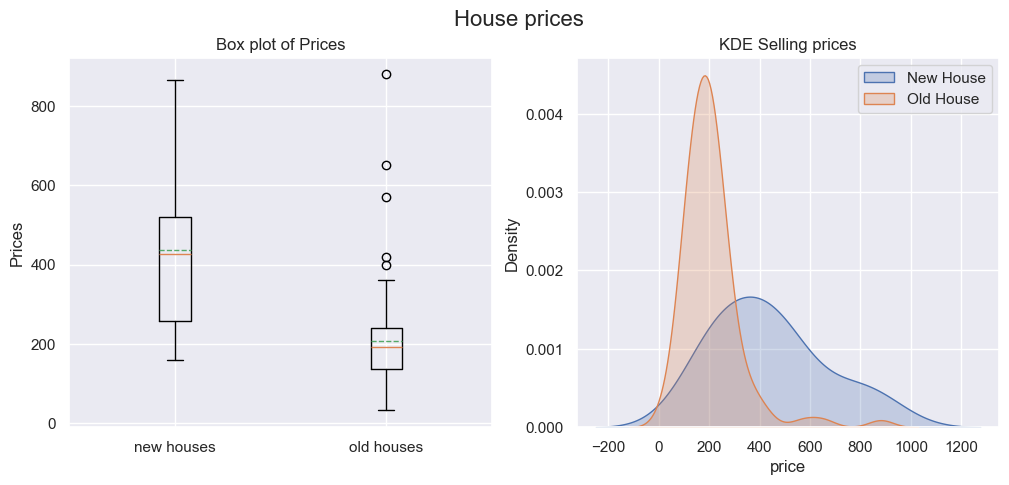

In [113]:

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

# defining plots for new and old houses using the information available
ax0.boxplot([new_houses["price"], old_houses["price"]], 
            meanline=True, showmeans=True, tick_labels=['new houses', 'old houses'])
ax0.set_title('Box plot of Prices')
ax0.set_ylabel('Prices')

sns.kdeplot(new_houses["price"], label='New House', fill= 'True', ax=ax1)
sns.kdeplot(old_houses["price"], label='Old House', fill= 'True', ax=ax1)

ax1.set_title('KDE Selling prices')
ax1.set_ylabel('Density')


fig.suptitle('House prices', fontsize=16)
plt.legend()
fig.set_figwidth(12)
plt.show() 


In [110]:
# Descriptive statistics for new homes
new_stats = new_houses['price'].describe()

# Descriptive statistics for old homes
old_stats = old_houses['price'].describe()

print("New Homes Statistics:\n", new_stats);print()
print("Old Homes Statistics:\n", old_stats);print()

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(new_houses['price'], old_houses['price'])

print("T-statistic: %.4f" % t_stat)
print("P-value: %.6f" % p_value);print()


# Confidence Interval for different proportions
old_houses_se = stats.sem(old_homes['price'])
new_houses_se = stats.sem(new_houses['price'])
mean_diff = np.mean(new_houses["price"]) - np.mean(old_houses["price"])
se_diff = np.sqrt(old_houses_se**2 + new_houses_se**2)

print("==== Confidence Interval for the Difference ====")
find_confidence_interval(mean_diff, se_diff)


New Homes Statistics:
 count     11.000000
mean     436.445455
std      219.832789
min      158.850000
25%      256.950000
50%      427.500000
75%      519.675000
max      866.250000
Name: price, dtype: float64

Old Homes Statistics:
 count     89.000000
mean     207.851124
std      121.039149
min       31.500000
25%      135.000000
50%      190.800000
75%      240.000000
max      880.500000
Name: price, dtype: float64

T-statistic: 5.3183
P-value: 0.000001

==== Confidence Interval for the Difference ====
95% Confidence Interval:  [96.2700, 360.9187]
